In [115]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)

In [2]:
data = pd.read_csv('xclara.csv')
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [9]:
X = np.array(list(zip(f1,f2)))

In [121]:
len(X)

3000

In [6]:
# getting the list values from the dataframe
f1 = data['V1'].values
f2 = data['V2'].values

In [123]:
# first row must match first row of dataframe
X[0]

array([ 2.072345, -3.241693])

### Plotting the Scatter Plot

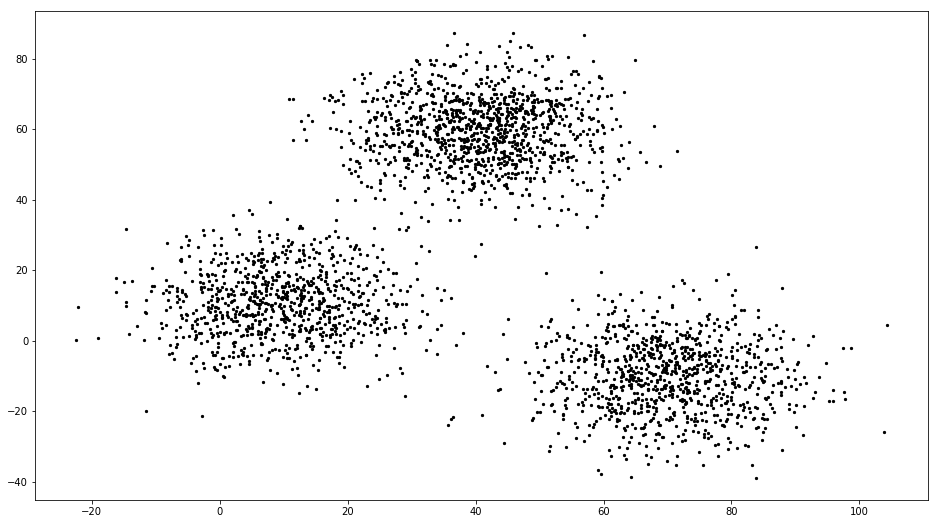

In [28]:
plt.scatter(f1,f2,c="black",s=5)

### Distance Function

In [29]:
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [84]:
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [32]:
k = 3

### Pick k random centroids

In [88]:
CX = np.random.randint(0,np.max(X),k)
CY = np.random.randint(0,np.max(X),k)
c = np.array(list(zip(CX,CY)),dtype=np.float32)

In [98]:
c

array([[95., 67.],
       [49.,  3.],
       [77., 16.]], dtype=float32)

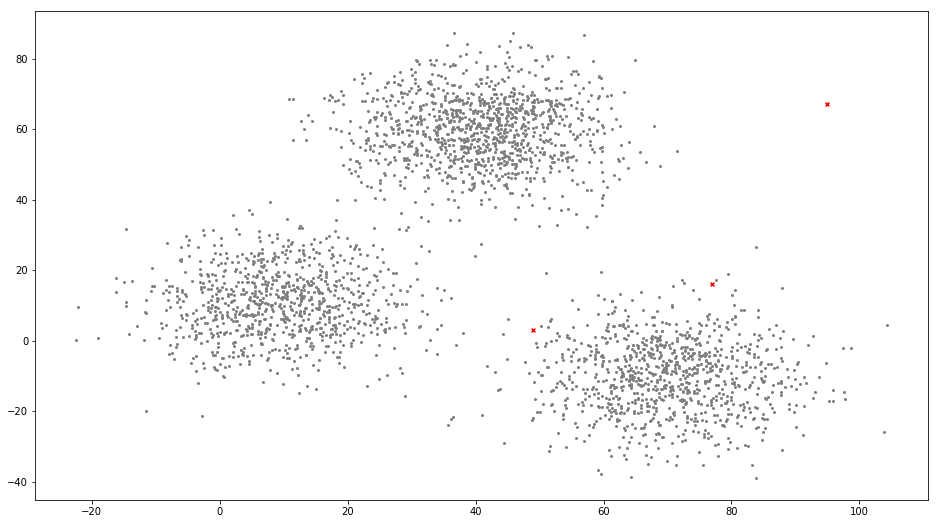

In [97]:
plt.scatter(f1,f2,c='gray',s=4)
plt.scatter(CX,CY,c='red',marker="x",s=15)

### Kmeans Algorithms:

In [106]:
c

array([[95., 67.],
       [49.,  3.],
       [77., 16.]], dtype=float32)

In [107]:
X[2]

array([1.083576, 7.319176])

In [109]:
dist(c,X[2])

array([111.27486441,  48.11069497,  76.41112575])

In [110]:
np.argmin(dist(X[2],c))

1

In [126]:
print (clusters)
print(len(clusters))

[1. 1. 1. ... 2. 2. 2.]
3000


In [130]:
c.shape

(3, 2)

In [134]:
old_c = np.zeros(c.shape)
clusters = np.zeros(len(X))
error = dist(c,old_c,None)
while error != 0:
    for i in range(len(X)):
        clusters[i] = np.argmin(dist(X[i],c))
    C_old = deepcopy(c)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j]== i]
        c[i] = np.mean(points,axis=0)
    error = dist(c,C_old,None)

In [140]:
def kmeans(X,k):
    CX = np.random.randint(0,np.max(X),k)
    CY = np.random.randint(0,np.max(X),k)
    c = np.array(list(zip(CX,CY)),dtype=np.float32)
    old_c = np.zeros(c.shape)
    clusters = np.zeros(len(X))
    error = dist(c,old_c,None)
    while error != 0:
        for i in range(len(X)):
            clusters[i] = np.argmin(dist(X[i],c))
        C_old = deepcopy(c)
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j]== i]
            c[i] = np.mean(points,axis=0)
        error = dist(c,C_old,None)
    colors = ['r','g','b','c','y','m']
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([ X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:,0],points[:,1],s=7,c=colors[i])
    ax.scatter(c[:,0],c[:,1],marker="*",s=100,c='orange')

In [ ]:
kmeans(X,5)

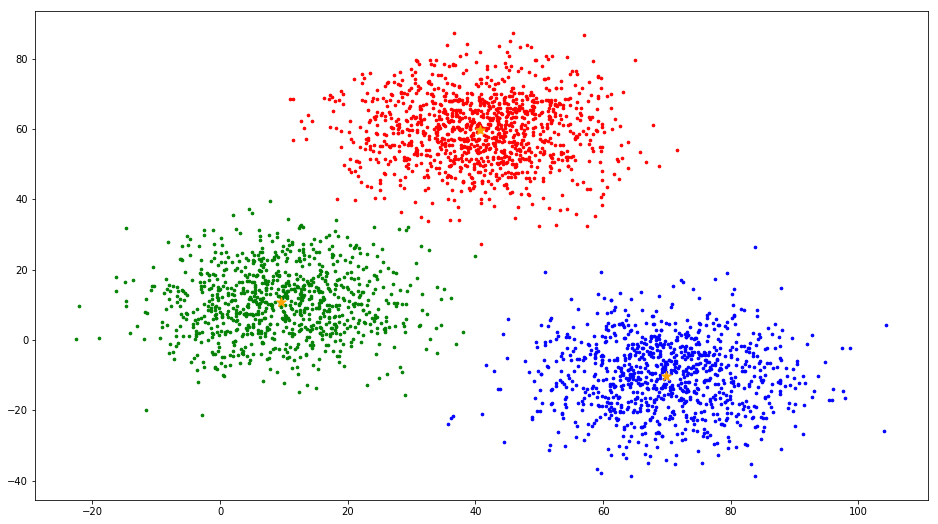

In [139]:
colors = ['r','g','b','c','y','m']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([ X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:,0],points[:,1],s=7,c=colors[i])
ax.scatter(c[:,0],c[:,1],marker="*",s=100,c='orange')